In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import git.focus_stack_refinement.support_scripts as supp
import re

In [2]:
def rescale_frame(frame, scale_percentage=100):
    width = int(frame.shape[1] * scale_percentage / 100)
    height = int(frame.shape[0] * scale_percentage / 100)
    dim = (width, height)
    return cv.resize(frame, dim, interpolation=cv.INTER_AREA), width, height

In [3]:
video_path = 'datasets/VIDEOS-CARFULLY-EXTRACT/zip-files/4.04.2020/Спинной мозг/'
video_name = 'fast.mp4'
supp.extract_frames(video_path + video_name, 'datasets/for_tests/spinal cord/')

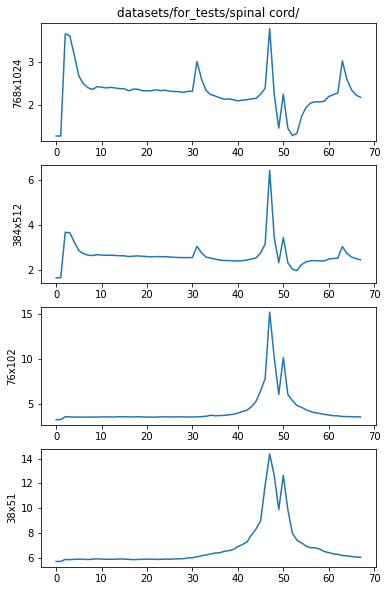

In [12]:
stack_path = 'datasets/for_tests/spinal cord/'

downscale_factors = [100, 50, 10, 5]

ax = None
plt.figure(num=None, figsize=(6,10))
for downscale_factor_i in range(0, len(downscale_factors)):
    downscale_factor = downscale_factors[downscale_factor_i]
    if ax is not None:
        ax = plt.subplot(len(downscale_factors), 1, downscale_factor_i+1, sharex=ax)
    else:
        ax = plt.subplot(len(downscale_factors), 1, downscale_factor_i+1)
        ax.set_title(stack_path)

    stack = []
    for frame_id in range(0, len(os.listdir(stack_path))):
        stack_frame = cv.imread(stack_path + f'frame{frame_id}.jpg', cv.IMREAD_COLOR)
        rescaled_frame, w, h = rescale_frame(stack_frame, downscale_factor)
        stack.append(rescaled_frame)
    res = supp.get_focus_results_from_array(stack, measure='LAPM', to_grayscale=True)
    ax.set_ylabel(str(h) + 'x' + str(w))
    plt.plot(res)
plt.show()


In [3]:
stack_path = r'datasets/VIDEOS-CARFULLY-EXTRACT/low_res/'
datasets = ['Earthworm', 'Honeybee leg', 'Эпидермис репчатого лука']


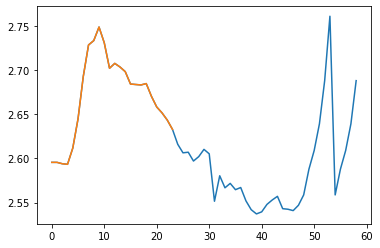

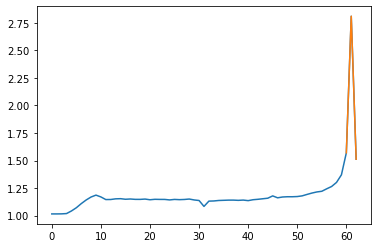

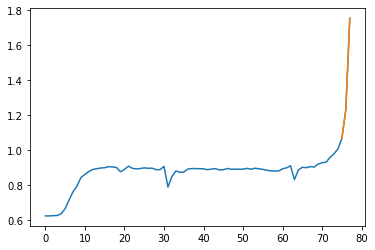

In [5]:
dataset_number = 0
dataset_stacks = list(filter(lambda x: re.match(datasets[dataset_number], x) is not None, os.listdir(stack_path)))
ax = None
speed = 'fast'
operator = 'LAPM'
# for dataset_i in range(0, len(dataset_stacks)):
#     if ax is not None:
#         ax = plt.subplot(len(dataset_stacks), 1, dataset_i+1, sharex=ax)
#     else:
#         ax = plt.subplot(len(dataset_stacks), 1, dataset_i+1)
#         ax.set_title(stack_path)
#
#     video_path = stack_path + dataset_stacks[dataset_i] + f'/{speed}.mp4'
#     stack = supp.get_frames_as_array(video_path)
#     res = supp.get_focus_results_from_array(stack, measure=operator, to_grayscale=True)
#     ax.set_ylabel(dataset_stacks[dataset_i][-7:])
#     try:
#         supp.find_peak(None, path_to_video=(video_path), focus_measure='LAPM', filter_window=11)
#     except RuntimeError:
#         print('Peak not found: ' + dataset_stacks[dataset_i])
#     plt.plot(res)
# plt.show()
for dataset_i in range(0, len(dataset_stacks)):
    video_path = stack_path + dataset_stacks[dataset_i] + f'/{speed}.mp4'
    try:
        supp.find_peak(None, path_to_video=(video_path), focus_measure=operator, filter_window=11)
    except RuntimeError:
        print('Peak not found: ' + dataset_stacks[dataset_i])


In [24]:
dataset_stacks

['Honeybee leg 160x120', 'Honeybee leg 320x240', 'Honeybee leg 640x480']

In [41]:
stack = supp.get_frames_as_array(stack_path + dataset_stacks[2] + '/fast.mp4')
len(stack)



78